## Importing Libraries and Data

In [18]:
import pandas as pd
import requests
from io import  StringIO
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
url = "http://bit.ly/w-data"
response = requests.get(url)
actual_url = response.url
df = pd.read_csv(actual_url)

In [36]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [13]:
df.shape

(25, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


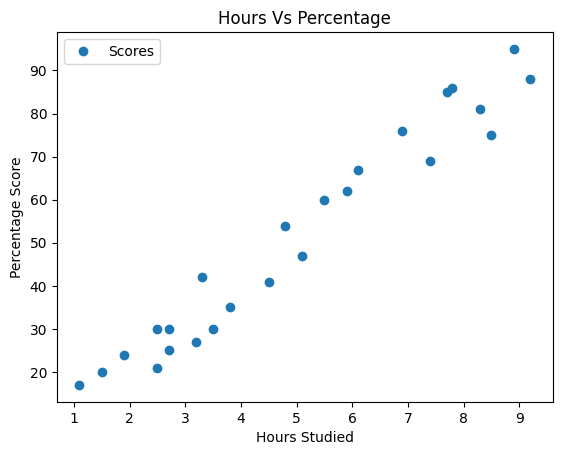

In [19]:
df.plot(x = 'Hours',y = 'Scores',style = 'o')
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [21]:
X = df.iloc[:, :-1]
Y = df.iloc[:,1]

## Splitting the data for training and testing

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state= 2)

In [25]:
from sklearn.linear_model import LinearRegression

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [27]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

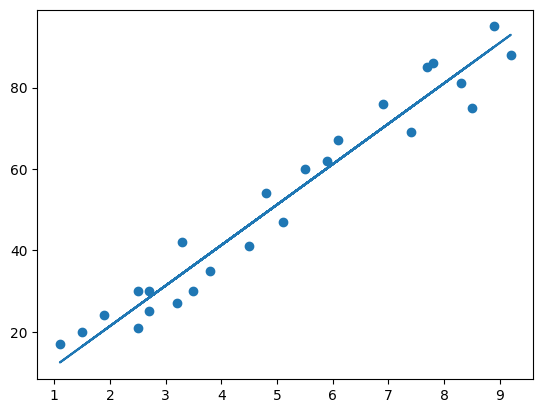

In [28]:
line = LR.coef_ * X + LR.intercept_

plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [31]:
y_pred = LR.predict(X_test)
y_pred

array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

In [32]:
X_test['Score'] = y_pred

In [34]:
X_test.sort_index()

,Hours,Score
0,2.5,26.359448
6,9.2,92.961570
14,1.1,12.442587
17,1.9,20.395079
23,6.9,70.098155


In [46]:
# Comparing Actual vs Predicted values
pred_df = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
pred_df.sort_index()

,Actual,Predicted
0,21,26.359448
6,88,92.961570
14,17,12.442587
17,24,20.395079
23,76,70.098155


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [44]:
from sklearn import metrics

print('Mean Absolute Error:' ,metrics.mean_absolute_error(Y_test,y_pred))

Mean Absolute Error: 4.877039354964476


In [45]:
print('Mean Squared Error:' ,metrics.mean_squared_error(Y_test,y_pred))

Mean Squared Error: 24.387620339856596


## What will be the predicted score if a student studies for 9.25 hrs/day?

In [54]:
hour = 9.25
print(LR.predict([[hour]]))

[93.45860056]


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
